# Big Mart Sales Analysis

## Objecives:
This project focuses on exploratory data analysis (EDA) on the BigMart Sales dataset. The goal is to uncover insights about sales trends, identify factors influencing sales, and gain a better understanding of product and outlet performance.

In [7]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [9]:
#importing dataset
df= pd.read_csv('C:/Users/abhis/OneDrive/Desktop/Data Analysis Project/Data Sets/Sales Data Sets/Big Mart Sale Data.csv')

In [11]:
#Data strutcure
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
#Checking for missing data
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#Handling missing values
#Item weight
#items with same identifiers is likely to have same weight
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
#Still some values are missing so filling it with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
#Handling missing values
#Outlet Size
#outlet size is related to outlet type

outlet_size_mode= df.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

#Creating a function to fill nan values
def fill_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
         return outlet_size_mode.get(row['Outlet_Type'], row['Outlet_Size'])
    return row['Outlet_Size']

In [27]:
df['Outlet_Size']=df.apply(fill_outlet_size, axis=1)

In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
#Checking categorical data
values = df['Item_Fat_Content'].unique()
values

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [128]:
#Standardising the values of Item Fat Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [132]:
values = df['Item_Fat_Content'].unique()
values

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
#Creating a new column for Outlet operating years
current_year= datetime.datetime.now().year

df['Outlet_Operating_Years']= current_year-df['Outlet_Establishment_Year']


In [39]:
#Droping Outlet Establishment Year
df.drop(columns=['Outlet_Establishment_Year'], inplace=True)

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operating_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,38


C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


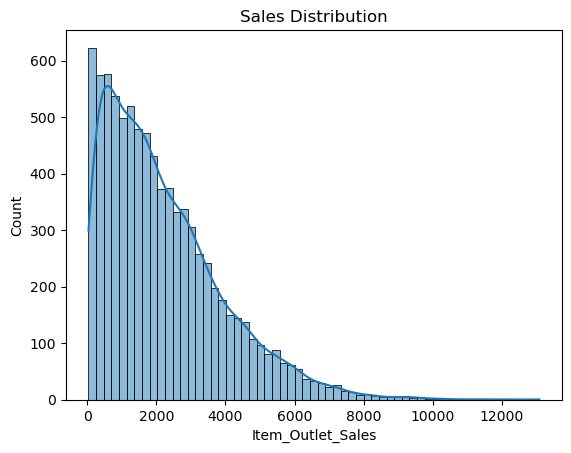

In [43]:
#Item outlet sales distribution
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()


In [46]:
#segregating total outlet sales into low, medium and high
bins = [0, 1500, 3500, df['Item_Outlet_Sales'].max()]
labels = ['Low', 'Medium', 'High']
df['Sales_Category'] = pd.cut(df['Item_Outlet_Sales'], bins=bins, labels=labels)


In [48]:
#separating low sales data
low_sales_data = df[df['Sales_Category'] == 'Low']


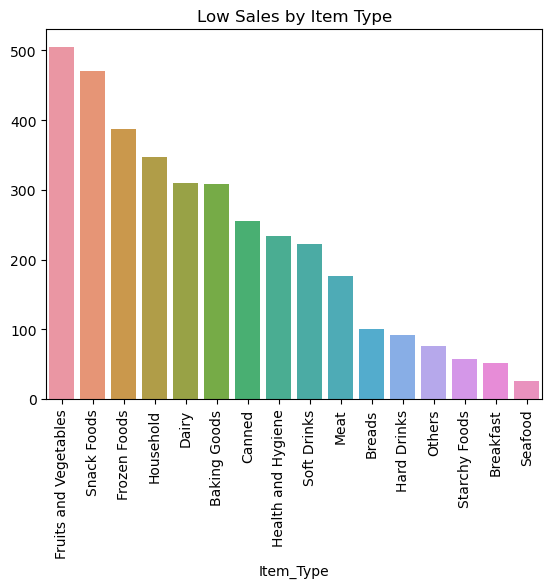

In [50]:
#Low sales items categorized by item type
low_sales_item_type = low_sales_data['Item_Type'].value_counts()
sns.barplot(x=low_sales_item_type.index, y=low_sales_item_type.values)
plt.xticks(rotation=90)
plt.title('Low Sales by Item Type')
plt.show()


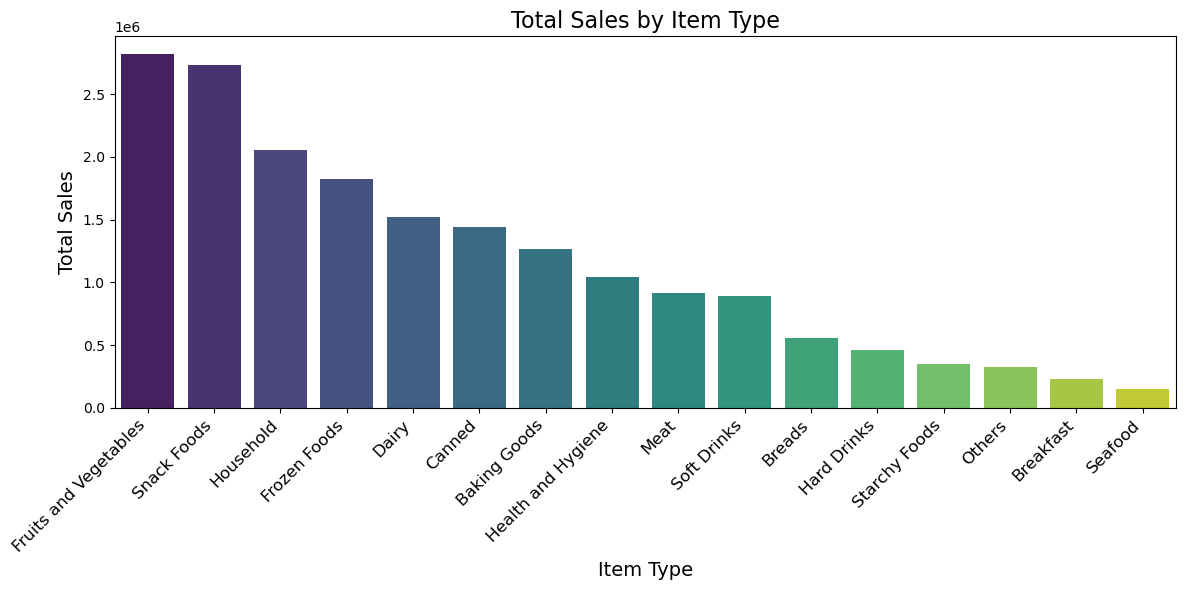

In [134]:
#Total sales by item type
# Aggregate total sales by item type
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=item_sales.index, y=item_sales.values, palette='viridis')

# Customize the plot
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

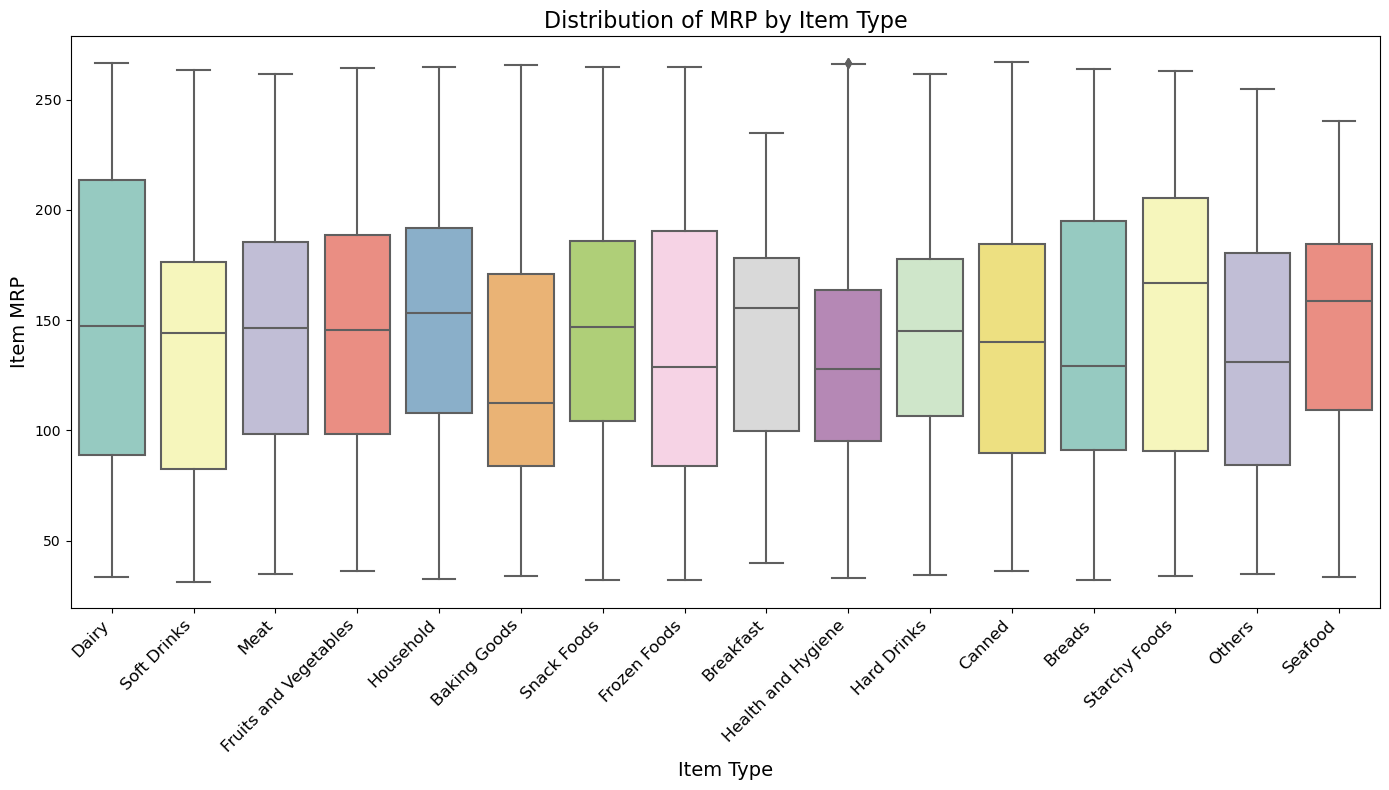

In [136]:
#Distribution of MRP by item type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df, palette='Set3')

# Customize the plot
plt.title('Distribution of MRP by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Item MRP', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


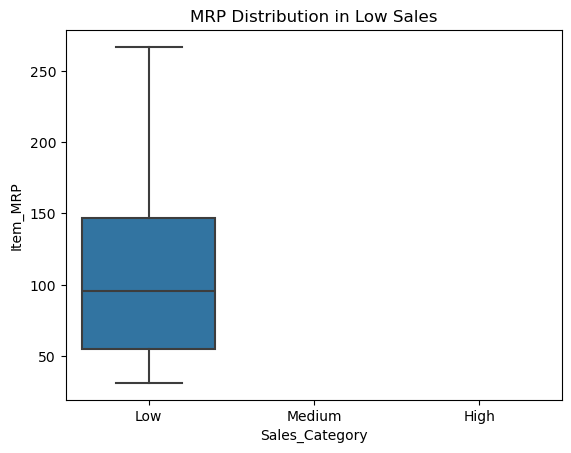

In [55]:
#Distribution of MRP in low sales
sns.boxplot(data=low_sales_data, x='Sales_Category', y='Item_MRP')
plt.title('MRP Distribution in Low Sales')
plt.show()


Most of the low sale items have similar price points( 50 to 150)

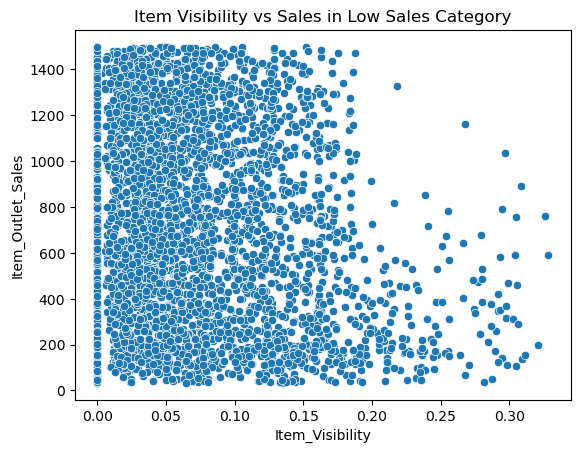

In [58]:
#item visibility in low sales category
sns.scatterplot(data=low_sales_data, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Item Visibility vs Sales in Low Sales Category')
plt.show()



In [60]:
#correlation between item visibility and sales
correlation = df[['Item_Visibility', 'Item_Outlet_Sales']].corr()
print(correlation)


                   Item_Visibility  Item_Outlet_Sales
Item_Visibility           1.000000          -0.128625
Item_Outlet_Sales        -0.128625           1.000000


There is a negetive correlation between item visibility and outlet sales

In [138]:
#Low sales by item type
# Group by Outlet Type and sum sales in low sales data
low_sales_sales_by_outlet_type = low_sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)


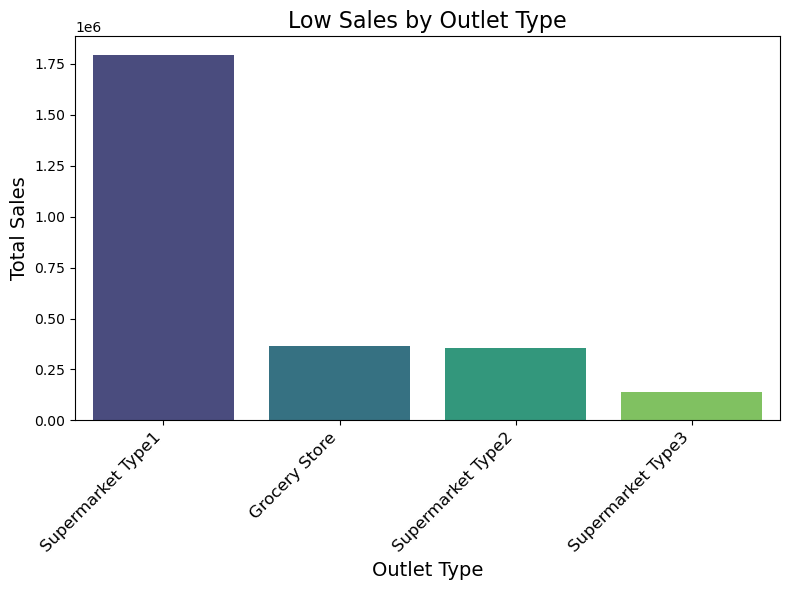

In [112]:
plt.figure(figsize=(8, 6))
sns.barplot(x=low_sales_sales_by_outlet_type.index, y=low_sales_sales_by_outlet_type.values, palette='viridis')

# Customize the plot
plt.title('Low Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

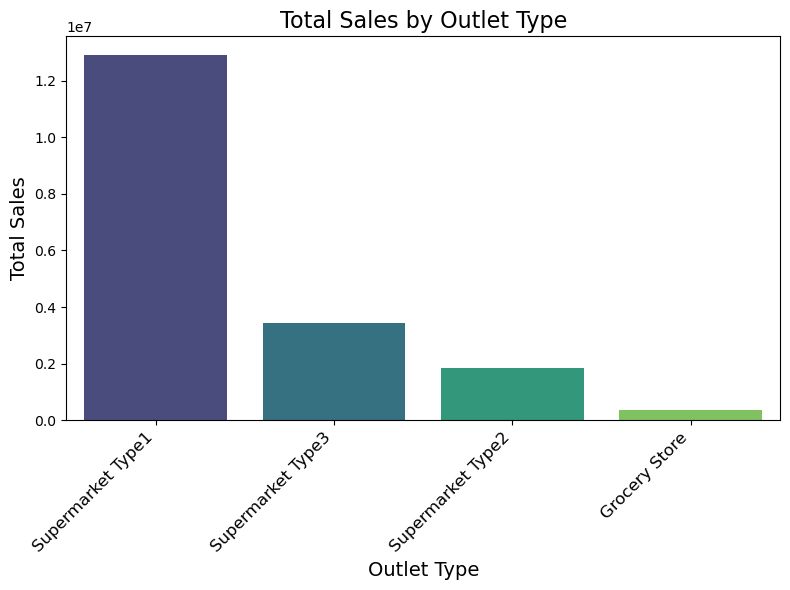

In [140]:
#Total sales by outlet type
# Group by Outlet Type and sum the total sales
total_sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)


# Plotting total sales by Outlet Type
plt.figure(figsize=(8, 6))
sns.barplot(x=total_sales_by_outlet_type.index, y=total_sales_by_outlet_type.values, palette='viridis')

# Customize the plot
plt.title('Total Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()



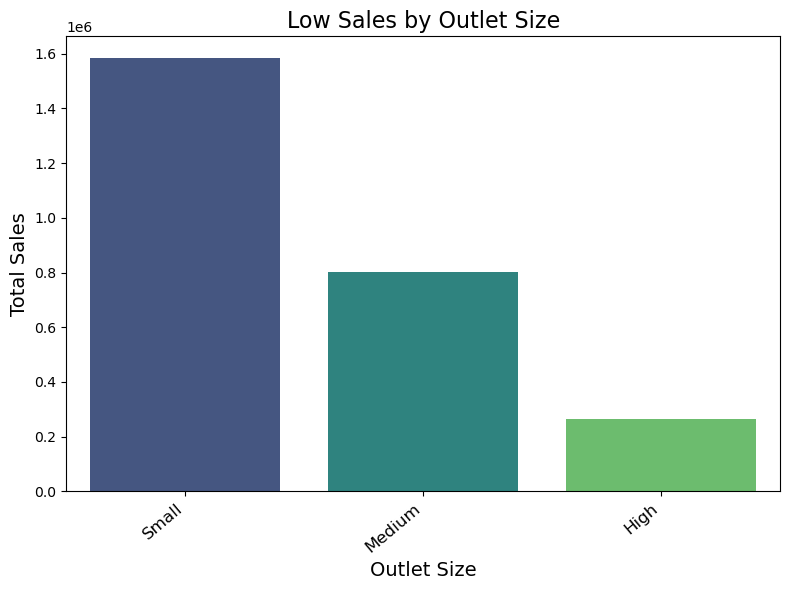

In [142]:
#Low sales by outlet size
# Group by Outlet Size and sum sales in low sales data
low_sales_sales_by_outlet_size = low_sales_data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False) 

plt.figure(figsize=(8, 6))
sns.barplot(x=low_sales_sales_by_outlet_size.index, y=low_sales_sales_by_outlet_size.values, palette='viridis')

# Customize the plot
plt.title('Low Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=40, ha='right', fontsize=12)
plt.tight_layout()

plt.show()


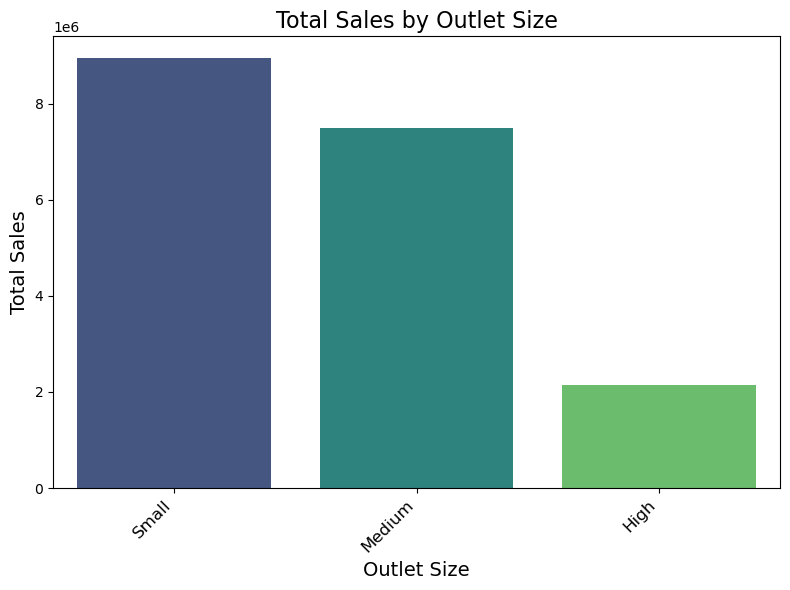

In [144]:
#Total sales by outlet size
# Group by Outlet Size and sum the total sales
total_sales_by_outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Plotting total sales by Outlet Size
plt.figure(figsize=(8, 6))
sns.barplot(x=total_sales_by_outlet_size.index, y=total_sales_by_outlet_size.values, palette='viridis')

# Customize the plot
plt.title('Total Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()


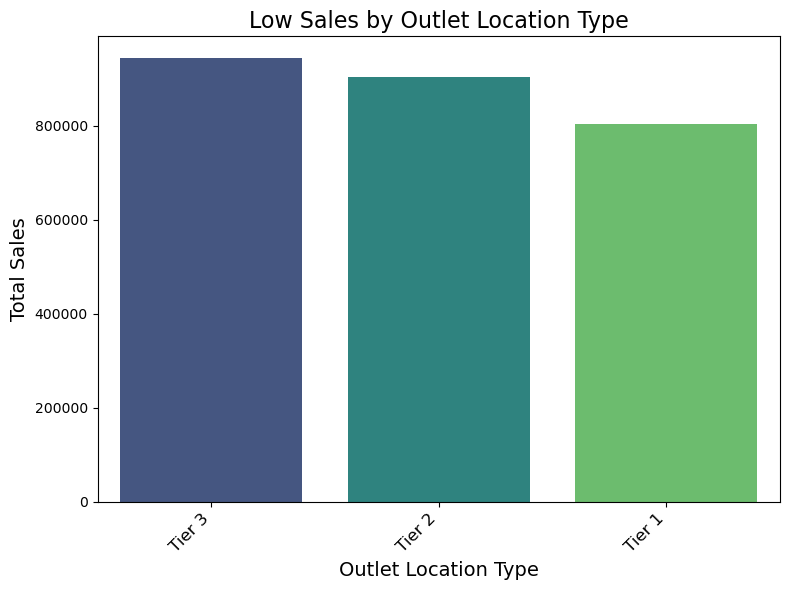

In [146]:
# Low sales by outlet location type
# Group by Outlet Location Type and sum sales in low sales data
low_sales_sales_by_location_type = low_sales_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=low_sales_sales_by_location_type.index, y=low_sales_sales_by_location_type.values, palette='viridis')

# Customize the plot
plt.title('Low Sales by Outlet Location Type', fontsize=16)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()


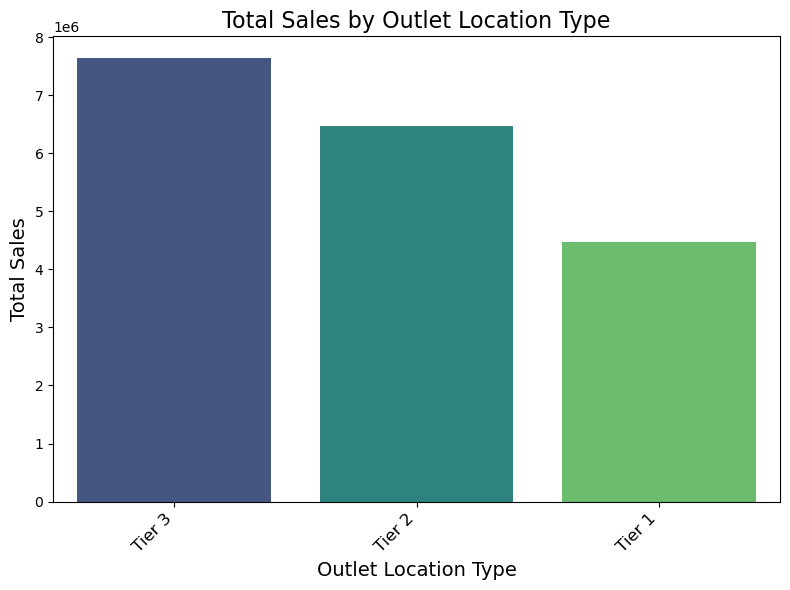

In [120]:
# Total sales by outlet location type
# Group by Outlet Location Type and sum the total sales
total_sales_by_location_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Plotting total sales by Outlet Location Type
plt.figure(figsize=(8, 6))
sns.barplot(x=total_sales_by_location_type.index, y=total_sales_by_location_type.values, palette='viridis')

# Customize the plot
plt.title('Total Sales by Outlet Location Type', fontsize=16)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()


In [148]:
#Correlation matrix
print(df[['Item_Visibility', 'Item_MRP', 'Item_Weight', 'Item_Outlet_Sales']].corr())


                   Item_Visibility  Item_MRP  Item_Weight  Item_Outlet_Sales
Item_Visibility           1.000000 -0.001315    -0.009168          -0.128625
Item_MRP                 -0.001315  1.000000     0.025972           0.567574
Item_Weight              -0.009168  0.025972     1.000000           0.013165
Item_Outlet_Sales        -0.128625  0.567574     0.013165           1.000000


In [152]:
# Export to a CSV file
df.to_csv('cleaned_bigmart_data.csv', index=False)
